# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [1]:
!git clone https://github.com/tensorflow/models
!apt-get -qq install protobuf-compiler python-pil python-lxml python-tk
!pip install --user Cython  --quiet
!pip install --user contextlib2 --quiet
!pip install --user jupyter --quiet
!pip install --user matplotlib --quiet
#Move to models/research folder
%cd models/research

#Convert protobuf files to Python code using Protobuf compiler installed in previous step
!protoc object_detection/protos/*.proto --python_out=.
#Change path to models/research and models/research/slim folders based on where you have cloned github repository above
%set_env PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim

#To be run from models/research folder
!python object_detection/builders/model_builder_test.py

Cloning into 'models'...
remote: Enumerating objects: 33643, done.
remote: Total 33643 (delta 0), reused 0 (delta 0), pack-reused 33643
Receiving objects: 100% (33643/33643), 512.06 MiB | 15.38 MiB/s, done.
Resolving deltas: 100% (21529/21529), done.
Checking out files: 100% (3194/3194), done.
Selecting previously unselected package python-bs4.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting 

### Change directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Load the training data from train.csv file

In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/Notebooks/RES10/train_labels.csv' .

In [0]:
import pandas as pd

In [7]:
train = pd.read_csv('train_labels.csv')
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Print the shape of the train dataset

In [9]:
train.shape

(173, 8)

### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [0]:
IMAGE_SIZE  = 128


### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [0]:
import numpy as np
import csv
with open('train_labels.csv','r') as csvfile:
    paths = []
    coords = np.zeros((sum(1 for line in csvfile) - 1, 4))
    spamreader = csv.reader(csvfile, delimiter=',')
    csvfile.seek(0)
    next(spamreader, None)
    for i,row in enumerate(spamreader):
        #print(row)
        for j, r in enumerate(row): # Parse row with seven entities
            #print(i)
            if((j!= 0) & (j!=3)):
                row[j] = int(r)
            
        #print(row)      
        path, width, height, class_, xmin, ymin, xmax, ymax = row
        paths.append(path)
        #print(i)
        coords[i,0] = xmin * IMAGE_SIZE / width
        coords[i,1] = ymin * IMAGE_SIZE / height
        coords[i,2] = xmax * IMAGE_SIZE / width # Normalize bounding box by image size
        coords[i,3] = ymax * IMAGE_SIZE / height

In [0]:
!cp -R '/content/drive/My Drive/Colab Notebooks/Notebooks/RES10/images' .

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [0]:
import image,cv2

In [23]:
paths

['raccoon-17.jpg',
 'raccoon-11.jpg',
 'raccoon-63.jpg',
 'raccoon-63.jpg',
 'raccoon-60.jpg',
 'raccoon-69.jpg',
 'raccoon-180.jpg',
 'raccoon-200.jpg',
 'raccoon-141.jpg',
 'raccoon-19.jpg',
 'raccoon-84.jpg',
 'raccoon-124.jpg',
 'raccoon-182.jpg',
 'raccoon-111.jpg',
 'raccoon-91.jpg',
 'raccoon-79.jpg',
 'raccoon-93.jpg',
 'raccoon-20.jpg',
 'raccoon-42.jpg',
 'raccoon-139.jpg',
 'raccoon-58.jpg',
 'raccoon-71.jpg',
 'raccoon-183.jpg',
 'raccoon-1.jpg',
 'raccoon-169.jpg',
 'raccoon-82.jpg',
 'raccoon-4.jpg',
 'raccoon-101.jpg',
 'raccoon-10.jpg',
 'raccoon-166.jpg',
 'raccoon-184.jpg',
 'raccoon-38.jpg',
 'raccoon-120.jpg',
 'raccoon-142.jpg',
 'raccoon-149.jpg',
 'raccoon-51.jpg',
 'raccoon-43.jpg',
 'raccoon-123.jpg',
 'raccoon-66.jpg',
 'raccoon-9.jpg',
 'raccoon-178.jpg',
 'raccoon-47.jpg',
 'raccoon-167.jpg',
 'raccoon-54.jpg',
 'raccoon-77.jpg',
 'raccoon-155.jpg',
 'raccoon-89.jpg',
 'raccoon-153.jpg',
 'raccoon-179.jpg',
 'raccoon-115.jpg',
 'raccoon-64.jpg',
 'raccoon-56

In [0]:
batch_images = np.zeros((len(paths),IMAGE_SIZE,IMAGE_SIZE,3),dtype=np.float32)

In [0]:
from keras.applications.mobilenet import MobileNet,preprocess_input
from PIL import Image

In [0]:
for index,image_name in enumerate(paths):
  img = Image.open('images/'+image_name)
  img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img = img.convert('RGB')
  batch_images[index] = preprocess_input(np.array(img,dtype=np.float32))

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [0]:
from keras.backend import clear_session
clear_session()
model = MobileNet(input_shape=(128,128,3),include_top=False,alpha=1.0)

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
X = model.layers[-1].output

In [0]:
from keras.layers import Conv2D,Reshape

In [0]:
X = Conv2D(4,kernel_size=4)(X)

In [0]:
X = Reshape((4,))(X)

In [0]:
from keras.models import Model

In [77]:
model = Model(input = model.input, output=X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("re...)`
  """Entry point for launching an IPython kernel.


In [78]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128 

### Define a custom loss function IoU which calculates Intersection Over Union

In [0]:
from keras.backend import epsilon
import tensorflow as tf
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [84]:
model.compile(optimizer='adam',loss='mse',metrics=[IoU])

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [85]:
model.fit(batch_images,coords,epochs=30,batch_size=32,verbose=1)



Epoch 1/30
173/173 [==============================] - 6s 35ms/step - loss: 4135.4535 - IoU: 0.0653
Epoch 2/30
173/173 [==============================] - 5s 29ms/step - loss: 877.5982 - IoU: 0.3878
Epoch 3/30
173/173 [==============================] - 5s 28ms/step - loss: 450.5792 - IoU: 0.5707
Epoch 4/30
173/173 [==============================] - 5s 28ms/step - loss: 587.6062 - IoU: 0.5268
Epoch 5/30
173/173 [==============================] - 5s 28ms/step - loss: 377.7762 - IoU: 0.6008
Epoch 6/30
173/173 [==============================] - 5s 28ms/step - loss: 215.9346 - IoU: 0.6495
Epoch 7/30
173/173 [==============================] - 5s 28ms/step - loss: 211.3223 - IoU: 0.6448
Epoch 8/30
173/173 [==============================] - 5s 28ms/step - loss: 186.2121 - IoU: 0.6664
Epoch 9/30
173/173 [==============================] - 5s 28ms/step - loss: 155.4357 - IoU: 0.7084
Epoch 10/30
173/173 [==============================] - 5s 29ms/step - loss: 137.8553 - IoU: 0.7306
Epoch 11/30
173/

### Pick a test image from the given data

In [0]:
test_image_path =  'images/raccoon-108.jpg'

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [0]:
# Pick a test image, run model, show image, and show predicted bounding box overlaid on the image
import cv2
#image_name = '/content/drive/My Drive/AIML/R10/images/raccoon-144.jpg'
unscaled = cv2.imread(test_image_path) # Original image for display
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox

### Predict the coordinates of the bounding box for the given test image

In [137]:
model.predict(x=np.array([img]))

array([[ 31.260265 ,  -3.2411575, 135.89244  , 131.07843  ]],
      dtype=float32)

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

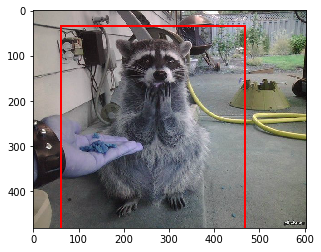

In [138]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()